<h3> NBA 5 year careeer prediction using XBoost Classifier

In [1]:
import pandas as pd
import numpy as np

<h4> 1. Load processed sets

<h5> Loading scaled training, validation and test sets from data_prep step saved on the data/processed folder saving them into X_train, X_val, y_train, y_val, X_test, X_test_ID variables

In [2]:
#Load Test and validation sets using custom function load_sets
from src.data.sets import load_sets

In [3]:
X_train, X_val, y_train, y_val, X_test, X_test_ID = load_sets()

<h5> Reviewing weight of the minority vs mayority class to be used from the imported sets that had been re-sampled. As we can see, the training sets are 50% balanced

In [5]:
# calculating weights for unbalanced data validation
sum_wpos = len([item for item in y_train if item==1 ])
sum_wneg = len([item for item in y_train if item==0 ])
sum_wneg/sum_wpos

1.0

<h4> 2. Import Random Forest

<h5> Importing and fitting Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

<h4> 2.1 Analyse features importance in random forest model with current training sets

<h5> We will use grid search using RandomizedSearchCV to iterate through various hyperparameters in the random forest model to find the best settings based on the training set provided

<h5> Random Search of parameters using cross validation totaling 300 fits

In [6]:
from sklearn.model_selection import RandomizedSearchCV

In [7]:
#Generating a Random grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [8]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   7.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  49.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1577; total time=  47.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=944; total time=  50.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=522; total time=  27.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1788; total time= 1.1min
[CV] END bootstrap=False, max_depth=90,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   8.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  49.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.6min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=733; total time=  39.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=944; total time=  50.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=522; total time=  27.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=944; total time=  48.9s
[CV] END bootstrap=True, max_depth=70, m

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   8.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=  38.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=  43.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.7min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=733; total time=  38.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=522; total time=  27.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=944; total time=  49.3s
[CV] END bootstrap=False, max_depth=10,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  46.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=  43.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1577; total time=  43.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1577; total time=  45.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=733; total time=  40.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=944; total time=  48.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=944; total time=  49.3s
[CV] END bootstrap=False, max_depth=10,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [9]:
rf_random.best_params_

{'n_estimators': 1366,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [49]:
rf_model = RandomForestClassifier(n_estimators = 1366, random_state=44, 
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_depth = 40,
                                  bootstrap=False)

In [50]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf_model
                     # , threshold = "0.98*mean"
                     )
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False, max_depth=40,
                                                 n_estimators=1366,
                                                 random_state=44))

<h4> 2.2 Finding the most relevant features in making predictions

<h5> After the model has been fitted, we use get.support to find out which features are most relevant in the predictions

In [51]:
columns = sel.get_support()
columns = columns.tolist()

<h5> As column importance is given in order of appearance on the scaled set, importing column names saved in data_prep for easy visualization and identification will be performed

<h5> Importing predictor column names and combining with relevant columns to find out the best feature predictors

In [86]:
predictors  = pd.read_csv('../data/interim/predictor_names.csv')

In [87]:
predictors_df = predictors.copy()

In [88]:
predictors = predictors['names'].tolist()

In [89]:
predictors_df['Relevant_Feature'] = columns

In [90]:
print(predictors_df.loc[predictors_df['Relevant_Feature'] == 1])

         names  Relevant_Feature
0           GP              True
1          MIN              True
2          PTS              True
3          FGM              True
5          FG%              True
8          3P%              True
11         FT%              True
14         REB              True
20  Stl_per_GP              True
21        ORtg              True
22         PPP              True
23         TSP              True
24  Reb_per_GP              True
25  Min_per_GP              True


<h5> <b>CONCLUSION ON PREDICTORS: </b> Based on the rebalanced training set from data_prep, 14 features are the most relevant predictors with probability more than 50%. 6 of them being the calculated features

<h4> 3. Train RF Classifier with new calculated training sets

<h5> Next up, the RF classifier will be imported and trained with the new training set and saved into the models folder

In [56]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1366,
                       random_state=44)

<h5> After the model has been fitted, it will be saved in the models folder in case it needs to be re-called on a later process

In [57]:
from sklearn.metrics import accuracy_score

In [20]:
#Save model in the models folder
from joblib import dump
dump(rf_model, '../models/RF4.joblib')

<h4> 3.1 Generate predictions for training and validation sets in order to compare accuracy and AUROC

<h5> The fitted model will be used to predict the validation and test set

In [58]:
y_val_preds = rf_model.predict(X_val)

In [59]:
y_trainpreds = rf_model.predict(X_train)

<h4> 3.2 Calculate model score in training and validation sets to assess fitting accuracy

In [61]:
rf_model.score(X_train, y_train)

1.0

In [62]:
rf_model.score(X_val, y_val)

0.82625

<h5> The training model shows a perfect fit with the training set, however, the model score drops to 0.82 on the validation set suggesting there is overfitting in the training set

<h4> 4 Analysis of the validation set

<h5> 4.1 Confusion Matrix

<h5> Analysis of the results will be done through a confusion matrix and AUROC to gather insights as to where the accuracy/innacuracy exists in order to improve the model in future experiments <br> <br> We'll look into a confusion matrix to see the distribution of the predictions from the model

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

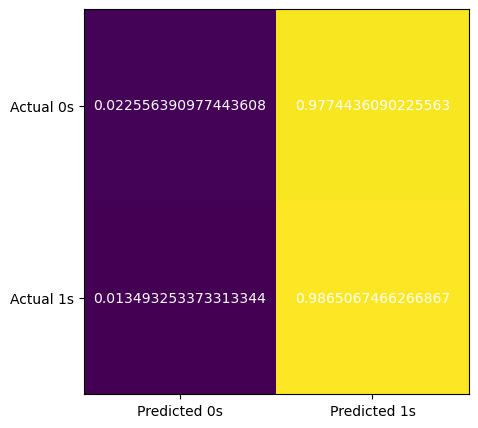

In [64]:
cm = confusion_matrix(y_val, y_val_preds , normalize='true'
                     )

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

<h5> As seen in the confusion matrix, 92% of true positive target was predicted correctly, however, 97% of negative target was predicted incorrectly (false positive)

<h5> 4.2 AUROC

In [65]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [66]:
y_val_prob = rf_model.predict_proba(X_val)

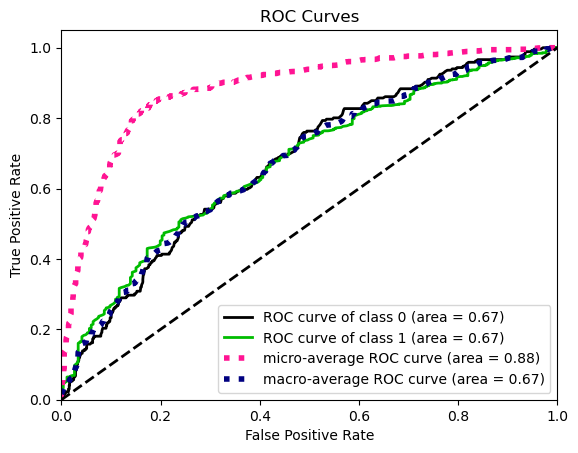

In [67]:
skplt.metrics.plot_roc(y_val, y_val_prob)
plt.show()

<h5> When analysing AUROC on the validation set, the mean ROC AUC is 0.67, meaning the model is predicting only 69% of the instances correctly

<h5> 4.3 Analysis of false positives vs positives to identify patterns

<h5> Analysing true positives vs false positives as this is where the model is not accurately predicting the target

In [68]:
X_val_df = pd. DataFrame(X_val, columns = predictors)

In [69]:
y_val_list = y_val.tolist()
X_val_df['y_val']=y_val_list

In [70]:
X_val_df['y_val_preds']=y_val_preds

In [71]:
#True Negatives
X_val_true_neg = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==0)]
X_val_true_neg.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,3P_per_GP,Stl_per_GP,ORtg,PPP,TSP,Reb_per_GP,Min_per_GP,Blk_per_GP,y_val,y_val_preds
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.0
mean,30.833333,8.066667,2.316667,0.866667,2.500000,37.283333,0.200000,0.650000,28.100000,0.383333,...,0.007363,0.013759,70.259271,0.702593,0.427136,0.022879,0.272798,0.001399,0.0,0.0
std,8.471521,3.321847,1.028429,0.332666,1.102724,5.009358,0.394968,1.125611,13.534992,0.194079,...,0.015302,0.006059,6.337859,0.063379,0.031901,0.009236,0.127218,0.001574,0.0,0.0
min,19.000000,4.000000,1.000000,0.400000,1.100000,29.500000,0.000000,0.000000,12.900000,0.100000,...,0.000000,0.006667,63.476562,0.634766,0.377562,0.010000,0.133333,0.000000,0.0,0.0
25%,26.750000,6.000000,1.550000,0.625000,1.600000,34.850000,0.000000,0.025000,16.625000,0.250000,...,0.000000,0.009707,64.462600,0.644626,0.411139,0.020780,0.215751,0.000000,0.0,0.0
50%,29.500000,7.600000,2.600000,1.000000,2.800000,38.000000,0.050000,0.200000,29.750000,0.450000,...,0.001190,0.013023,70.846273,0.708463,0.430672,0.021241,0.247947,0.001190,0.0,0.0
75%,36.750000,9.800000,2.750000,1.075000,3.250000,40.175000,0.100000,0.525000,34.475000,0.500000,...,0.003095,0.016878,74.503688,0.745037,0.447104,0.024588,0.283122,0.002518,0.0,0.0
max,42.000000,13.200000,3.700000,1.200000,3.700000,43.500000,1.000000,2.900000,47.900000,0.600000,...,0.038462,0.023077,78.328982,0.783290,0.466700,0.038462,0.507692,0.003448,0.0,0.0


In [72]:
X_val_true_neg.shape

(6, 29)

In [73]:
#False Positive
X_val_false_pos = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==1)]
X_val_false_pos.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,3P_per_GP,Stl_per_GP,ORtg,PPP,TSP,Reb_per_GP,Min_per_GP,Blk_per_GP,y_val,y_val_preds
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.0,260.0
mean,53.400000,14.520385,5.356538,2.061154,4.854231,42.189615,0.310000,0.931154,22.199615,0.987692,...,0.006039,0.010075,81.715683,0.817157,0.485733,0.045664,0.280701,0.004339,0.0,1.0
std,16.033315,6.585183,2.968795,1.161509,2.596884,5.895808,0.280334,0.807393,15.810137,0.668776,...,0.006065,0.006283,11.486578,0.114866,0.057849,0.029651,0.118568,0.008515,0.0,0.0
min,4.000000,2.900000,0.800000,0.300000,0.800000,27.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,44.426494,0.444265,0.333333,0.006154,0.082979,0.000000,0.0,1.0
25%,43.750000,9.975000,3.100000,1.200000,2.900000,38.075000,0.000000,0.175000,10.000000,0.500000,...,0.000000,0.005405,74.367928,0.743679,0.441406,0.023480,0.204435,0.000000,0.0,1.0
50%,53.000000,13.200000,4.850000,1.800000,4.450000,41.950000,0.300000,0.900000,21.050000,0.800000,...,0.005345,0.009423,80.708044,0.807080,0.485244,0.037807,0.256905,0.002837,0.0,1.0
75%,64.000000,17.975000,6.725000,2.700000,6.300000,45.750000,0.500000,1.400000,31.500000,1.300000,...,0.008969,0.012706,89.202866,0.892029,0.525959,0.062247,0.335004,0.005819,0.0,1.0
max,93.000000,38.100000,15.800000,6.200000,14.800000,58.100000,1.400000,3.900000,73.700000,4.200000,...,0.037500,0.043750,128.406709,1.284067,0.717213,0.186842,0.950000,0.118182,0.0,1.0


In [74]:
X_val_false_pos.shape

(260, 29)

In [75]:
# True Positives
X_val_true_pos = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==1)]
X_val_true_pos.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,3P_per_GP,Stl_per_GP,ORtg,PPP,TSP,Reb_per_GP,Min_per_GP,Blk_per_GP,y_val,y_val_preds
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,...,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.0,1316.0
mean,64.663374,19.194073,7.539970,2.910410,6.425000,45.058663,0.326368,0.967097,20.473404,1.461094,...,0.005283,0.010524,86.419634,0.864196,0.511007,0.052186,0.297803,0.005206,1.0,1.0
std,16.588233,8.934321,4.325026,1.703521,3.619229,6.132419,0.308085,0.880756,14.557029,0.914417,...,0.005377,0.005984,10.410617,0.104106,0.054267,0.028667,0.112560,0.009718,0.0,0.0
min,10.000000,4.000000,1.000000,0.400000,1.100000,27.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,54.207537,0.542075,0.355450,0.007143,0.085106,0.000000,1.0,1.0
25%,53.000000,12.675000,4.400000,1.675000,3.800000,40.900000,0.000000,0.100000,8.500000,0.800000,...,0.000000,0.006329,79.482592,0.794826,0.475521,0.030645,0.213370,0.001613,1.0,1.0
50%,64.000000,17.200000,6.600000,2.500000,5.600000,44.900000,0.300000,0.900000,19.000000,1.300000,...,0.004348,0.009302,86.300248,0.863002,0.510882,0.047368,0.281662,0.003571,1.0,1.0
75%,76.000000,24.025000,9.700000,3.700000,8.300000,49.100000,0.500000,1.600000,30.900000,1.900000,...,0.008333,0.013440,93.220744,0.932207,0.545052,0.066216,0.363665,0.006122,1.0,1.0
max,115.000000,59.400000,30.300000,12.000000,28.600000,63.600000,1.700000,4.700000,72.300000,7.000000,...,0.050000,0.044444,130.813953,1.308140,0.724249,0.257576,0.962162,0.225000,1.0,1.0


In [76]:
X_val_true_pos.shape

(1316, 29)

In [77]:
# False Negative
X_val_false_neg = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==0)]
X_val_false_neg.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,3P_per_GP,Stl_per_GP,ORtg,PPP,TSP,Reb_per_GP,Min_per_GP,Blk_per_GP,y_val,y_val_preds
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0
mean,38.777778,8.666667,2.450000,0.933333,2.677778,36.605556,0.227778,0.727778,24.477778,0.383333,...,0.005639,0.008855,69.522677,0.695227,0.418861,0.027253,0.228599,0.002531,1.0,0.0
std,9.308791,3.059796,1.302599,0.463998,1.411114,4.889662,0.224409,0.726641,10.450587,0.291548,...,0.005471,0.004614,7.518182,0.075182,0.037873,0.013336,0.071514,0.003379,0.0,0.0
min,19.000000,4.600000,1.000000,0.400000,1.100000,28.700000,0.000000,0.000000,6.200000,0.000000,...,0.000000,0.002564,60.034305,0.600343,0.367079,0.009804,0.117949,0.000000,1.0,0.0
25%,34.000000,5.975000,1.500000,0.600000,1.750000,33.900000,0.025000,0.200000,18.100000,0.200000,...,0.000641,0.004974,65.160050,0.651600,0.394750,0.013971,0.169602,0.000000,1.0,0.0
50%,39.000000,9.000000,1.900000,0.800000,2.150000,36.300000,0.200000,0.600000,27.850000,0.300000,...,0.005573,0.007690,68.559937,0.685599,0.406369,0.028583,0.234732,0.000000,1.0,0.0
75%,46.000000,10.350000,3.200000,1.150000,3.400000,38.450000,0.300000,1.050000,33.900000,0.475000,...,0.007598,0.012807,71.611662,0.716117,0.437633,0.038026,0.283280,0.005118,1.0,0.0
max,55.000000,16.600000,5.800000,2.100000,5.800000,49.000000,0.700000,2.400000,37.000000,1.000000,...,0.020588,0.016000,90.837283,0.908373,0.515233,0.052632,0.353191,0.010526,1.0,0.0


In [78]:
X_val_false_neg.shape

(18, 29)

<h5> True positives have very similar statistics than false positives making it difficult for the model to correclty classify the observations from that boundary <br> <br>
    additional sampling experimentation needs to be done for the observations in this boundary
    

<h4> 5 Generate predictions on the test set for Kaggle submission

<h5> The final step is to generate the prediction probabilities from the test set in order to evaluate the score from Kaggle via csv upload

In [79]:
y_test_preds = rf_model.predict_proba(X_test)

In [80]:
#Create Data Frame for Doc printing
df =pd.DataFrame()

In [81]:
y_test_preds

array([[0.31405564, 0.68594436],
       [0.26866764, 0.73133236],
       [0.08931186, 0.91068814],
       ...,
       [0.27306003, 0.72693997],
       [0.10029283, 0.89970717],
       [0.10688141, 0.89311859]])

In [82]:
target_prob = y_test_preds
target_prob = [item[1] for item in y_test_preds]

In [83]:
df['Id'] = X_test_ID
df['TARGET_5Yrs'] = target_prob

In [84]:
df.head()

,Id,TARGET_5Yrs
0,0,0.685944
1,1,0.731332
2,2,0.910688
3,3,0.960469
4,4,0.765007


In [85]:
#Saving predictions into csv
df.to_csv('../data/external/Kaggle_submission_RF_ncr_all_cols.csv', index=False)

<h5> Kaggle submission score is 0.68 which is in line with the AUROC metric